## Customer Churn Prediction

Customer attrition or churn, is when customers stop doing business with a company. It can have a significant impact on a company's revenue and it's crucial for businesses to find out the reasons why customers are leaving and take steps to reduce the number of customers leaving. One way to do this is by identifying customer segments that are at risk of leaving, and implementing retention strategies to keep them. Also, by using data and machine learning techniques, companies can predict which customers are likely to leave in the future and take actions to keep them before they decide to leave.

We are going to build a basic model for predicting customer churn using [Telco Customer Churn dataset](https://www.kaggle.com/blastchar/telco-customer-churn). We are using some classification algorithm to model customers who have left, using Python tools such as pandas for data manipulation and matplotlib for visualizations.


In [15]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px 

In [16]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

In [19]:
categorical_features = [ "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "Multipletines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", ] 
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"] 
target= "Churn"

In [20]:
df.skew(numeric_only= True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
df.shape

(7043, 21)

In [23]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df[numerical_features].describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000

In [26]:
df = df.drop(['customerID'], axis = 1)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

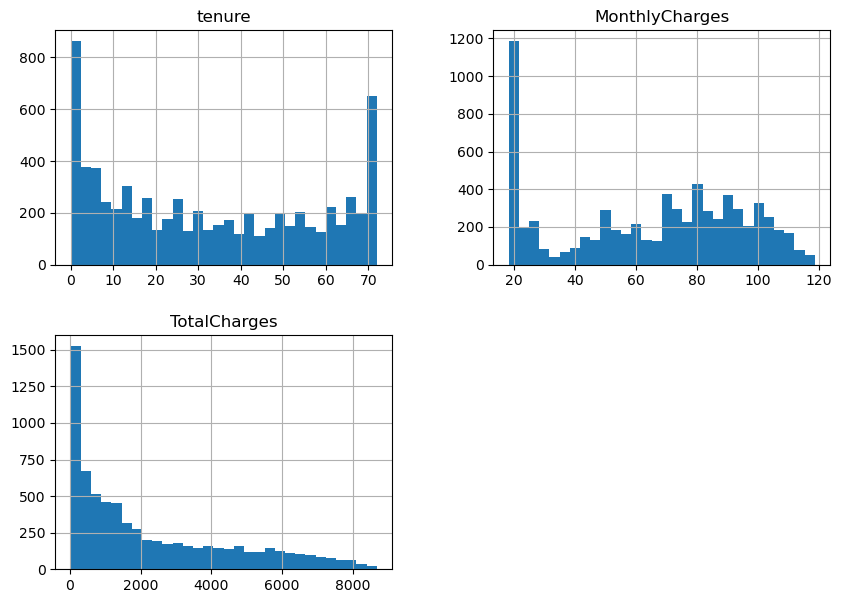

In [27]:
df[numerical_features].hist (bins=30, figsize=(10, 7))

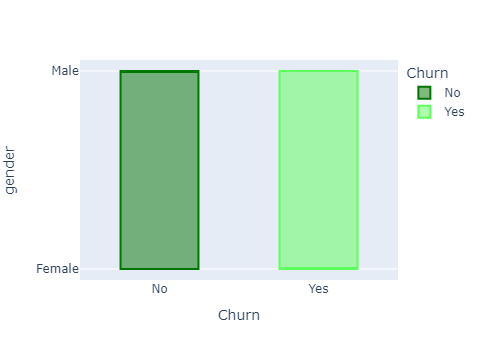

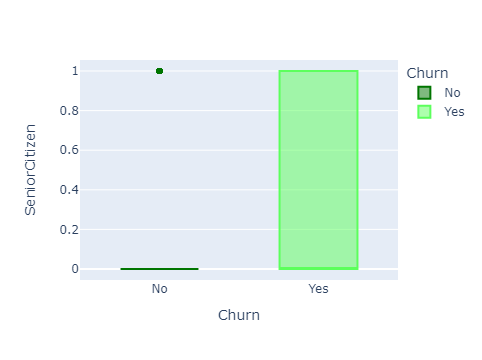

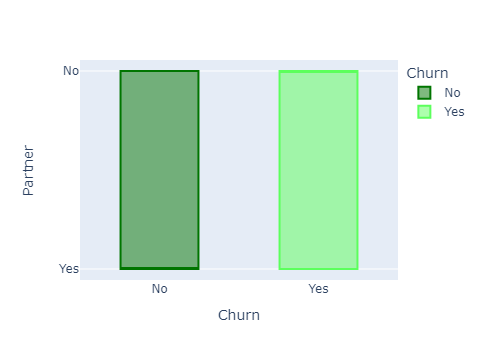

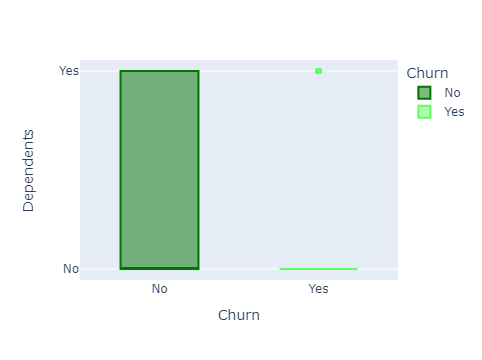

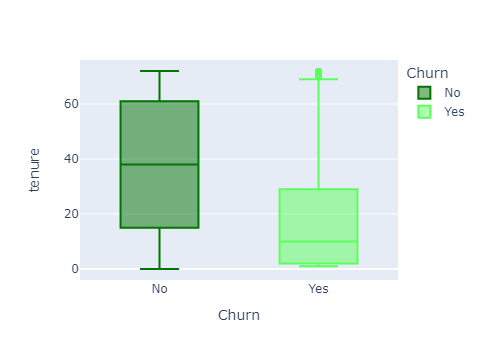

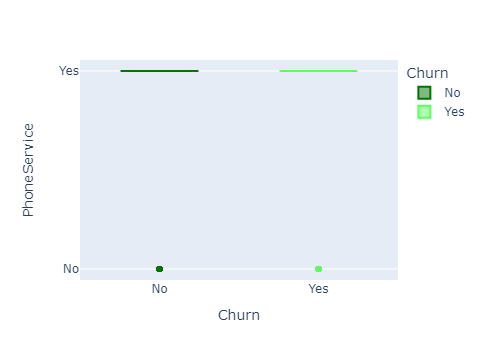

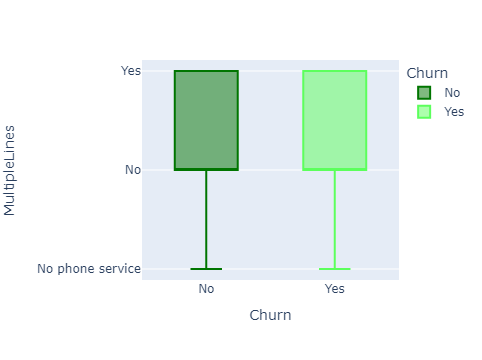

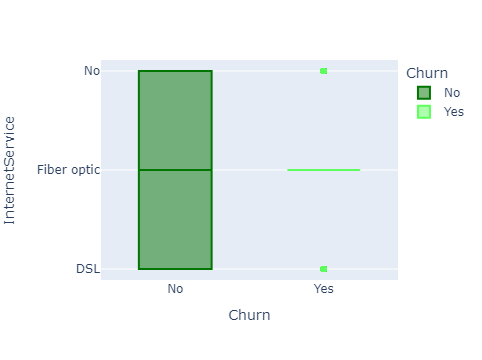

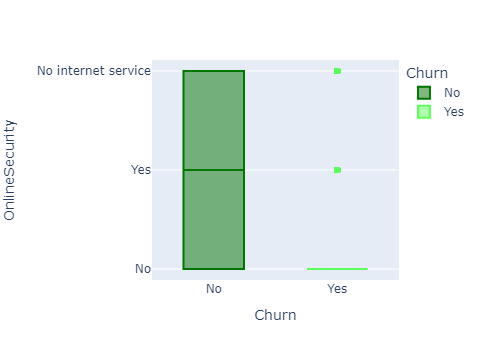

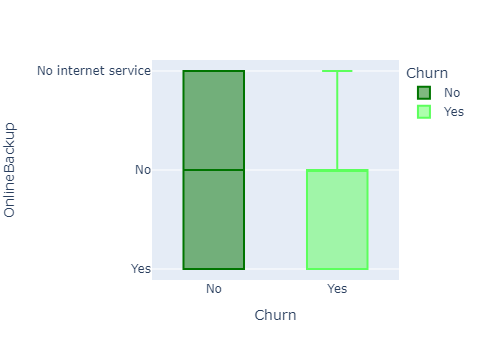

In [28]:
for column in  df.drop('Churn',axis=1).columns[:10]:
    fig = px.box(df,x='Churn',color='Churn',y=column,color_discrete_sequence=['#007500','#5CFF5C'],orientation='v')
    fig.show() 

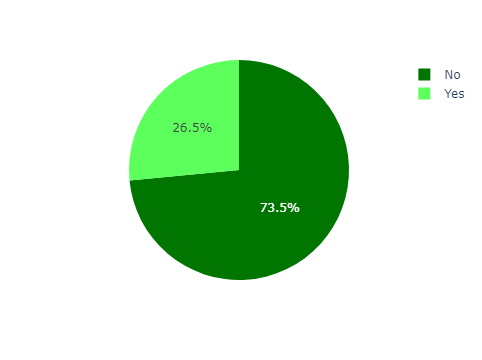

In [29]:
px.pie(df, 'Churn', color='Churn',color_discrete_sequence=['#007500','#5CFF5C'])

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

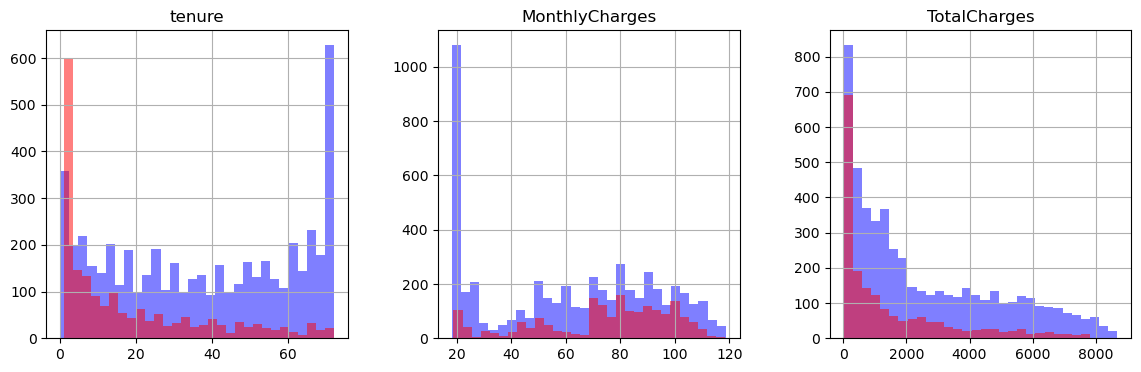

In [30]:
fig, ax = plt.subplots (1, 3, figsize=(14, 4)) 
df[df.Churn == "No"][numerical_features].hist (bins=30, color="blue", alpha=0.5, ax=ax) 
df[df.Churn == "Yes"][numerical_features].hist (bins=30, color="red", alpha=0.5, ax=ax)

Text(0.5, 1.0, 'churned')

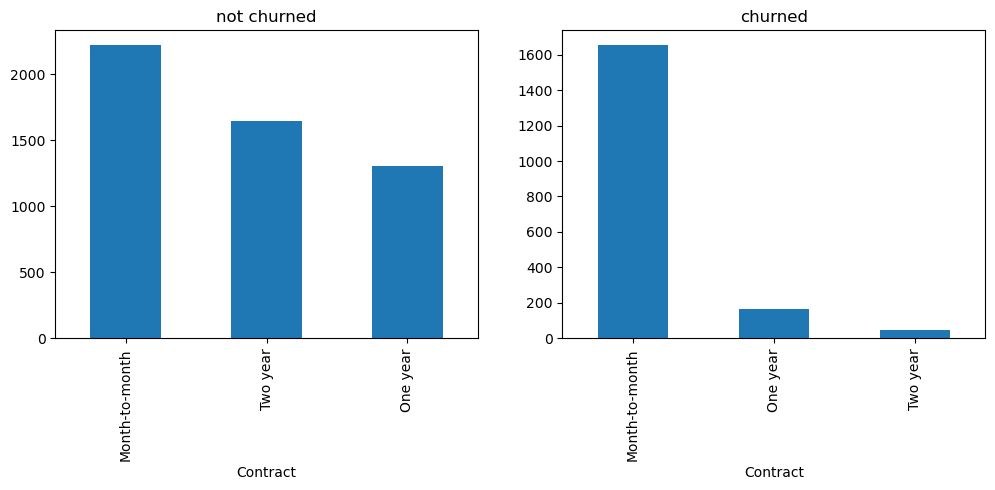

In [31]:
feature= 'Contract' 
fig, ax = plt.subplots(1, 2, figsize=(12, 4)) 
df[df.Churn == "No"] [feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned') 
df[df.Churn == "Yes"] [feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

Text(0.5, 1.0, 'churned')

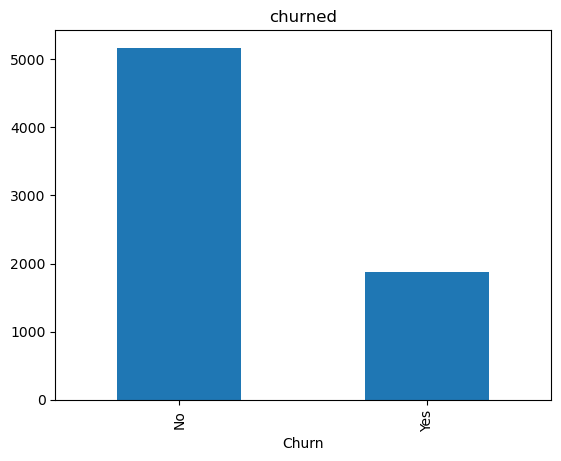

In [32]:
df[target].value_counts().plot(kind='bar').set_title('churned')

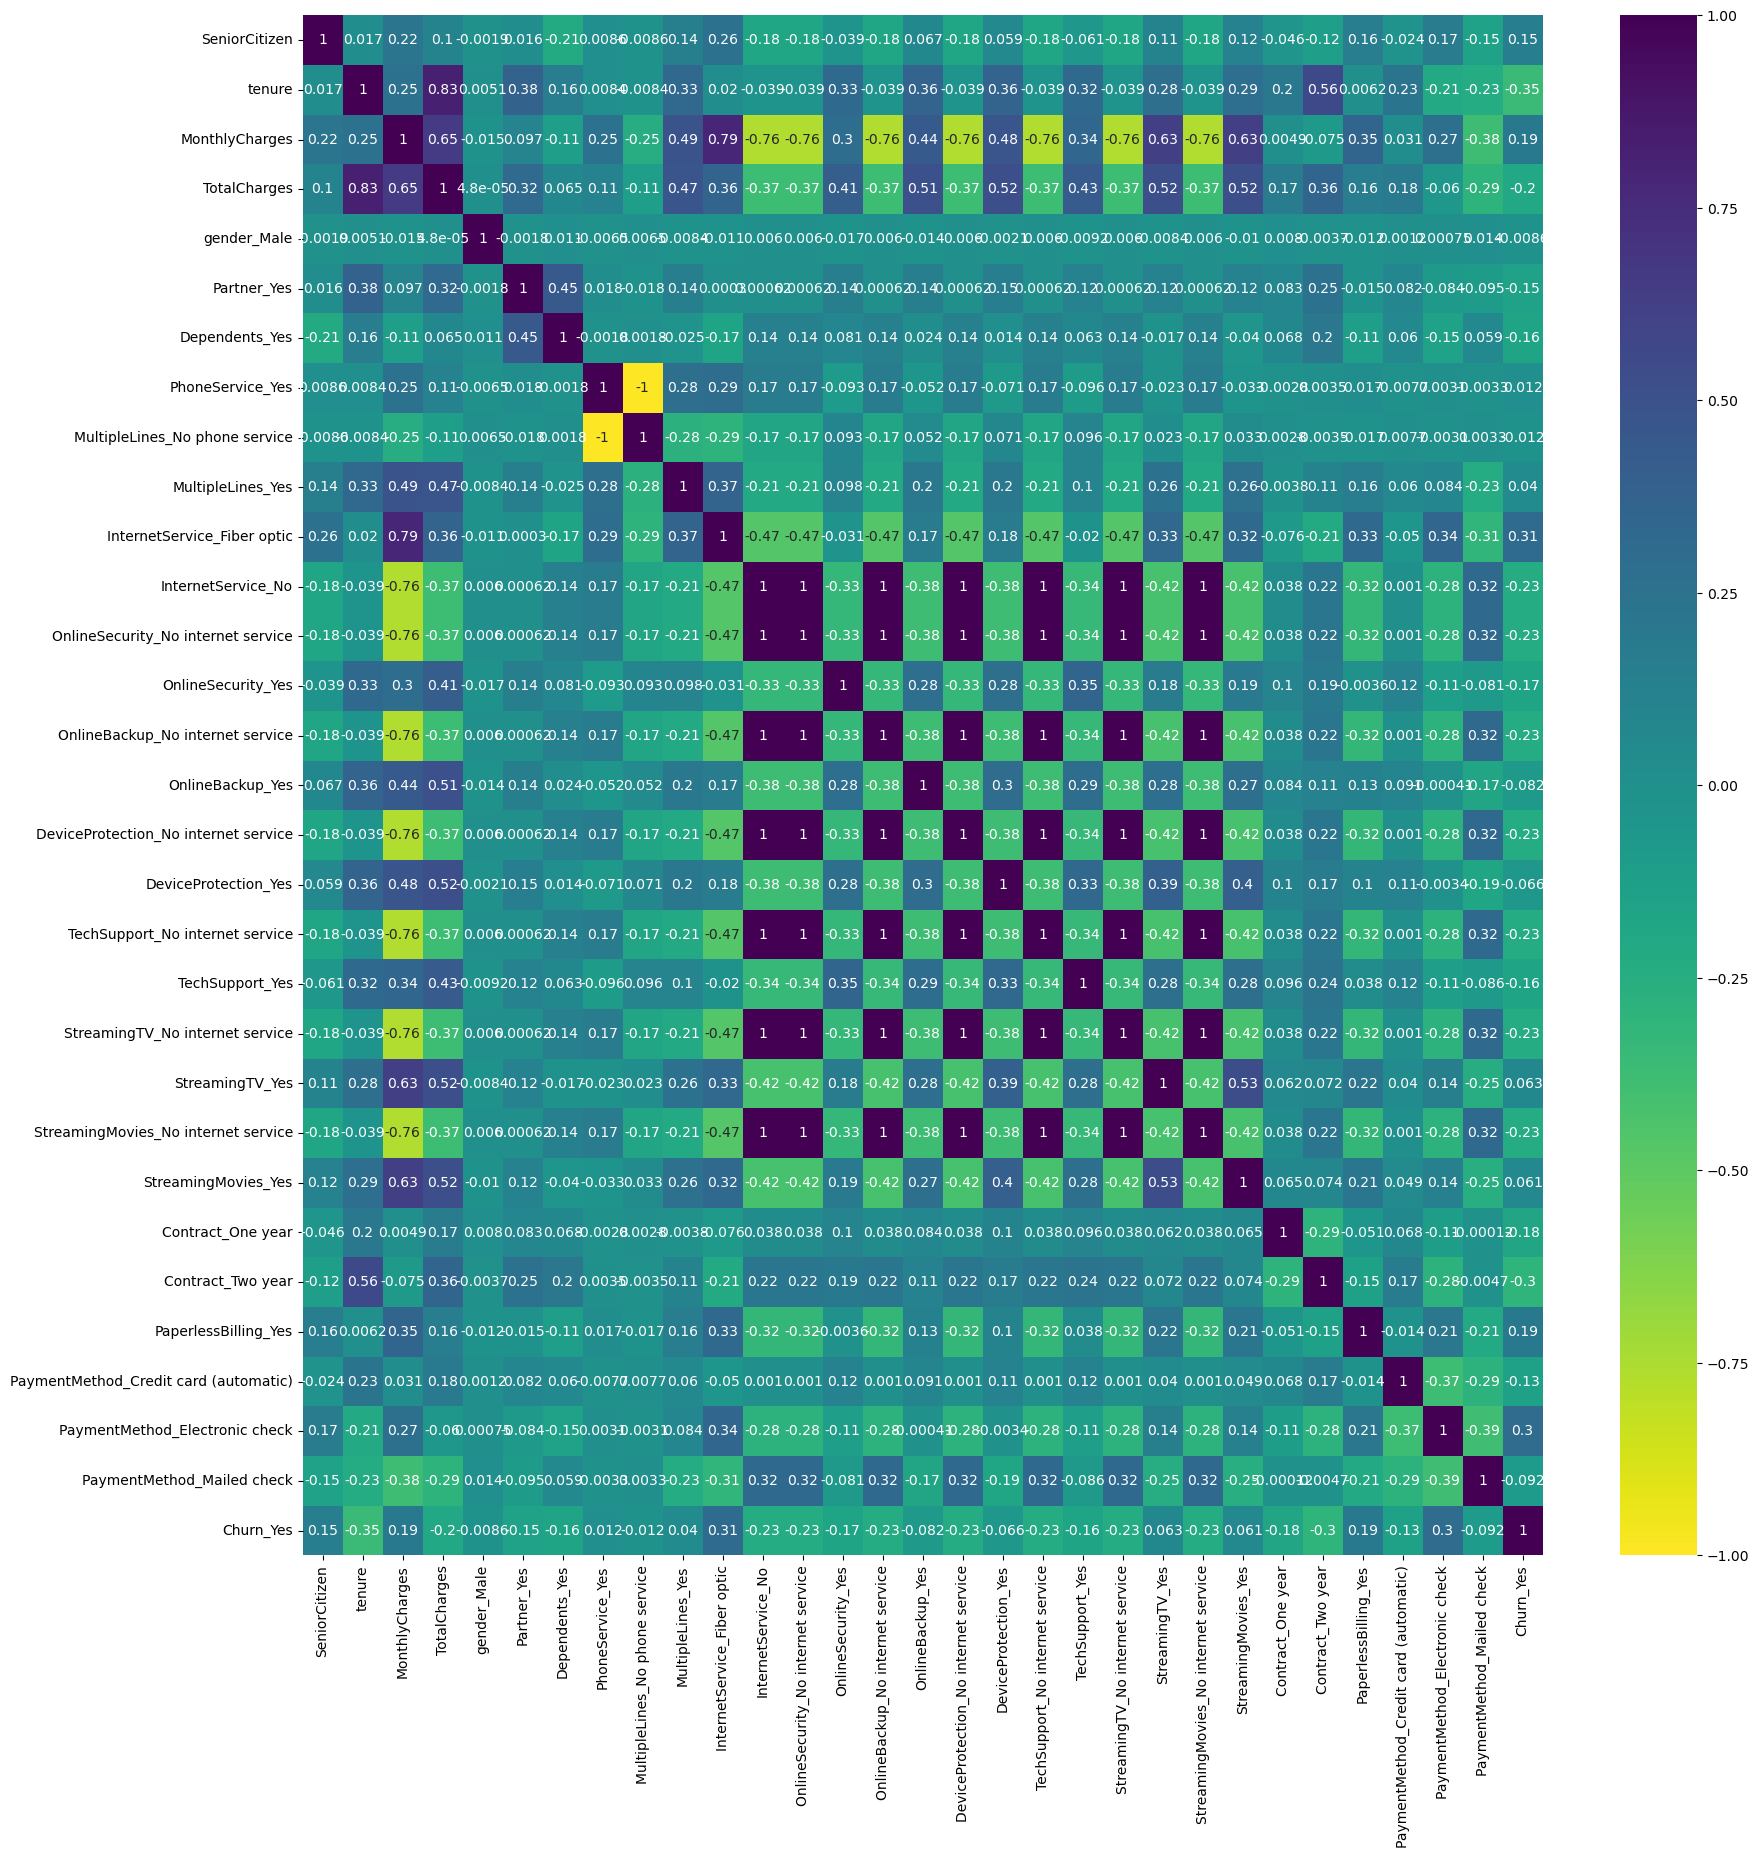

In [37]:
corr = df1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='viridis_r',annot=True)
plt.show()

In [38]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [39]:
df1.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85        False   
1              0      34           56.95       1889.50         True   
2              0       2           53.85        108.15         True   
3              0      45           42.30       1840.75         True   
4              0       2           70.70        151.65        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                            True              False  ...            False   
1                           False              False  ...            False   
2                           False              False  ...            False   
3                            True              False  ...            False   
4                           False              False  ...            False   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                False   
2                                False                False   
3                                False                False   
4                                False                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0              False              False                  True   
1               True              False                 False   
2              False              False                  True   
3               True              False                 False   
4              False              False                  True   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  Churn_Yes  
0                       False      False  
1                        True      False  
2                        True       True  
3                       False      False  
4                       False       True  

[5 rows x 31 columns]

In [40]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [41]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [42]:
df1.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85        False   
1              0      34           56.95       1889.50         True   
2              0       2           53.85        108.15         True   
3              0      45           42.30       1840.75         True   
4              0       2           70.70        151.65        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                            True              False  ...            False   
1                           False              False  ...            False   
2                           False              False  ...            False   
3                            True              False  ...            False   
4                           False              False  ...            False   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                False   
2                                False                False   
3                                False                False   
4                                False                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0              False              False                  True   
1               True              False                 False   
2              False              False                  True   
3               True              False                 False   
4              False              False                  True   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  Churn_Yes  
0                       False      False  
1                        True      False  
2                        True       True  
3                       False      False  
4                       False       True  

[5 rows x 31 columns]

In [43]:
one_hot_encoded = pd.get_dummies(df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']])
one_hot_encoded = one_hot_encoded.astype(int)
print(one_hot_encoded)

      gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  \
0                 1            0           0            1              1   
1                 0            1           1            0              1   
2                 0            1           1            0              1   
3                 0            1           1            0              1   
4                 1            0           1            0              1   
...             ...          ...         ...          ...            ...   
7038              0            1           0            1              0   
7039              1            0           0            1              0   
7040              1            0           0            1              0   
7041              0            1           0            1              1   
7042              0            1           1            0              1   

      Dependents_Yes  PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0         

In [44]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

In [45]:
df1.shape

(7043, 31)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

In [48]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=44)

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)

In [50]:
print(classification_report(Y_test, y_pred_svc))

              precision    recall  f1-score   support

       False       0.83      0.92      0.87      1027
        True       0.70      0.50      0.58       382

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.79      1409



In [51]:
confusion_matrix = confusion_matrix(Y_test, y_pred_svc)

In [52]:
svc.score(X_train,Y_train)

0.8152289669861554

In [53]:
accuracy_score(Y_test, y_pred_svc)

0.8062455642299503

## Author

- **Author Name**: Krupa joshi
- **GitHub**: https://github.com/Krupa3006

Feel free to reach out with any questions or feedback!